In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [117]:
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

In [118]:
df.head()

,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
0,0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,07/07/2016,03/28/2018,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False
1,1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,07/07/2016,03/28/2018,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,11/27/2017,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False
3,3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,08/04/2017,02/05/2018,NaN,19110,17318.0,7169.0,DSF: 0000823560,True
4,4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560,False


In [119]:

df[df['Unnamed: 0'] == 1029]

,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
1029,1029,15,K333,THE LITTLE BROOKLYN PRE-K CTR,SCA Furniture & Equi,FY17 RESO A MOBILE SCIENCE LAB,F&E,Complete,01/19/2017,F&E,07/21/2017,152000,152000.0,152000.0,DSF: 0000844664,False


In [120]:
df[df['Unnamed: 0'] == 1096]

,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
1096,1096,15,K661,PRE-K CENTER @ 219 25TH STREET,PRE-K,LEASE,Scope,Complete,07/06/2015,07/30/2015,07/31/2015,211610,144313.0,143999.0,DSF: 0000822214,False


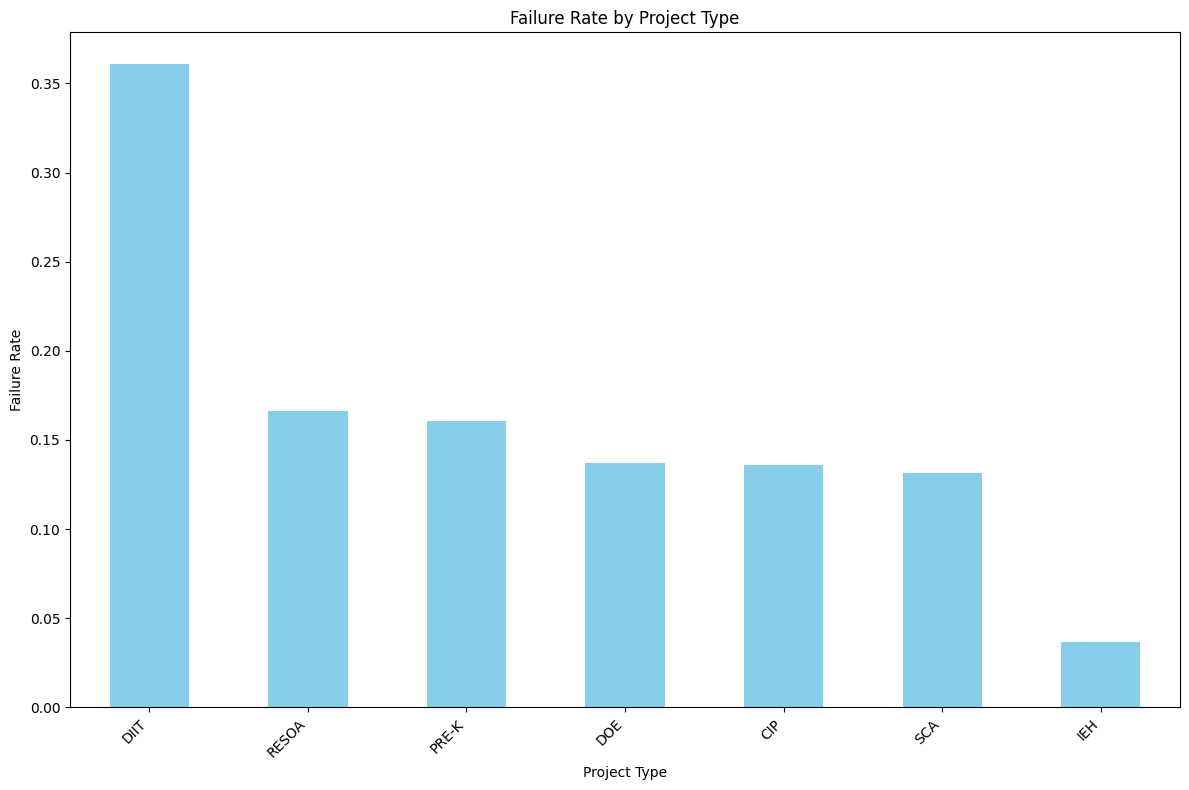

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# List of keywords to keep
keywords = [
    "SCA", "CIP", "DIIT", "DOE", "DOES", "DOER",
    "RESOA", "IEH", "PRE-K", "DCAS", "FY"
]

# Read the CSV file into a DataFrame
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Split the strings in the 'project_type' column by spaces
df['project_type_split'] = df['project_type'].str.split(" ")

# Explode the list into separate rows
df_exploded = df.explode('project_type_split')

# Filter the exploded DataFrame to keep only the specified keywords
df_filtered = df_exploded[df_exploded['project_type_split'].isin(keywords)]

# Calculate the failure rate for each project type
failure_rate = df_filtered.groupby('project_type_split')['failure'].mean()

# Sort the failure rate for better visualization
failure_rate = failure_rate.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
failure_rate.plot(kind='bar', color='skyblue')
plt.title('Failure Rate by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [122]:
df_filtered = df_exploded[df_exploded['project_type_split'].isin(['DOER'])]

In [123]:
df[df['dsf_number_s'] == '0000754684']

,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,project_type_split
